<font size="6"><center>Deep Learning</center></font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
!rm -r landscapes/__MACOSX

'rm' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


# 1) Séparation des données en un jeu d'apprentissage 80% et un jeu de validation 20% (dans des batch de taille 32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

input_dir = 'landscapes'

seed = 1
 
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)


train_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = datagen.flow_from_directory(
    input_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


Un affichage :

(32, 256, 256, 3) (32, 7)
[0. 0. 0. 1. 0. 0. 0.]


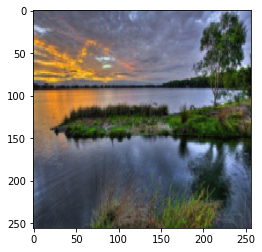

In [ ]:
x, y = next(train_generator)
print(x.shape, y.shape)
plt.imshow(x[0])
print(y[0])

(32, 256, 256, 3) (32, 7)
[0. 0. 0. 0. 0. 0. 1.]


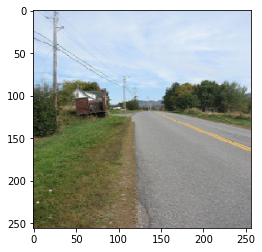

In [ ]:
x, y = next(validation_generator)
print(x.shape, y.shape)
plt.imshow(x[0])
print(y[0])

# 2) CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

num_classes = 7

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=94, # env. 3026/32
      epochs=10,
      validation_data=validation_generator,
      validation_steps=23) # env. 755/32 (inutile de faire un reapeat)

Epoch 1/10
94/94 [==============================] - 27s 200ms/step - loss: 7.6638 - accuracy: 0.2181 - val_loss: 1.2286 - val_accuracy: 0.6087
Epoch 2/10
94/94 [==============================] - 18s 190ms/step - loss: 1.3907 - accuracy: 0.5085 - val_loss: 1.0913 - val_accuracy: 0.5992
Epoch 3/10
94/94 [==============================] - 18s 192ms/step - loss: 0.8864 - accuracy: 0.6940 - val_loss: 0.9262 - val_accuracy: 0.6630
Epoch 4/10
94/94 [==============================] - 18s 196ms/step - loss: 0.5162 - accuracy: 0.8381 - val_loss: 1.0623 - val_accuracy: 0.6712
Epoch 5/10
94/94 [==============================] - 19s 198ms/step - loss: 0.2823 - accuracy: 0.9237 - val_loss: 1.0969 - val_accuracy: 0.6997
Epoch 6/10
94/94 [==============================] - 19s 200ms/step - loss: 0.1261 - accuracy: 0.9707 - val_loss: 4.1805 - val_accuracy: 0.6114
Epoch 7/10
94/94 [==============================] - 18s 196ms/step - loss: 0.2997 - accuracy: 0.9496 - val_loss: 1.5685 - val_accuracy: 0.6970

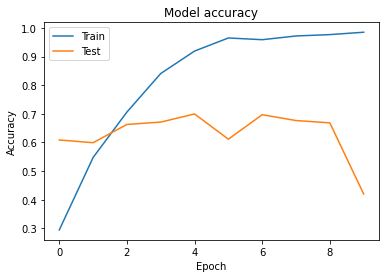

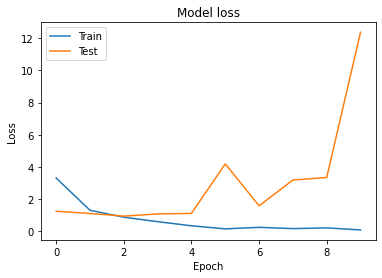

In [ ]:
def plot_learning_curves(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

plot_learning_curves(history)

# 3) Techniques pour améliorer le résultat

## 3.1) Ajout de dropout pour éviter le surapprentissage (après la couche dense).

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) #dropout
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=94,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=23)

Epoch 1/10
94/94 [==============================] - 19s 199ms/step - loss: 8.0678 - accuracy: 0.2656 - val_loss: 1.4247 - val_accuracy: 0.4348
Epoch 2/10
94/94 [==============================] - 18s 196ms/step - loss: 1.3486 - accuracy: 0.4979 - val_loss: 1.0356 - val_accuracy: 0.6128
Epoch 3/10
94/94 [==============================] - 19s 197ms/step - loss: 1.0413 - accuracy: 0.6333 - val_loss: 1.6928 - val_accuracy: 0.5217
Epoch 4/10
94/94 [==============================] - 19s 197ms/step - loss: 0.8179 - accuracy: 0.7377 - val_loss: 0.9284 - val_accuracy: 0.6726
Epoch 5/10
94/94 [==============================] - 19s 197ms/step - loss: 0.4846 - accuracy: 0.8552 - val_loss: 0.8600 - val_accuracy: 0.7432
Epoch 6/10
94/94 [==============================] - 19s 197ms/step - loss: 0.3302 - accuracy: 0.9033 - val_loss: 1.0565 - val_accuracy: 0.7215
Epoch 7/10
94/94 [==============================] - 19s 197ms/step - loss: 0.1750 - accuracy: 0.9459 - val_loss: 1.2143 - val_accuracy: 0.7473

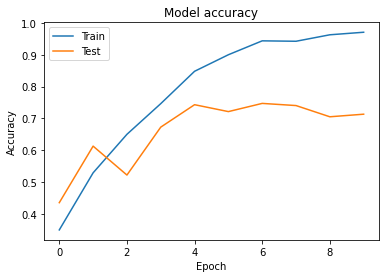

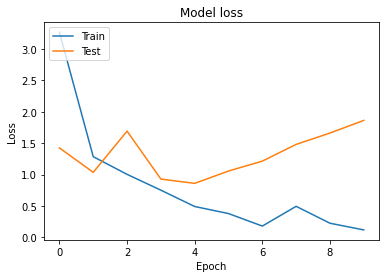

In [ ]:
plot_learning_curves(history)

## 3.2) Data augmentation

In [ ]:
augmenting_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # randomly shift images horizontally (fraction of total height)
    height_shift_range=0.2,# randomly shift images vertically (fraction of total height)
    shear_range=0.2,# set range for random shear
    zoom_range=0.2,# set range for random zoom
    horizontal_flip=True,# randomly flip images
    fill_mode='nearest', # set mode for filling points outside the input boundaries

    validation_split=0.2 # POUR RESTER COHERENT AVEC DATAGEN DEJA DEFINI, OK CAR SPLIT NON ALEATOIRE.
)

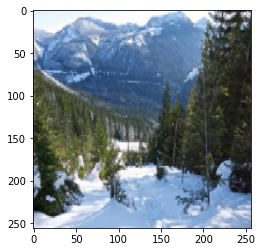

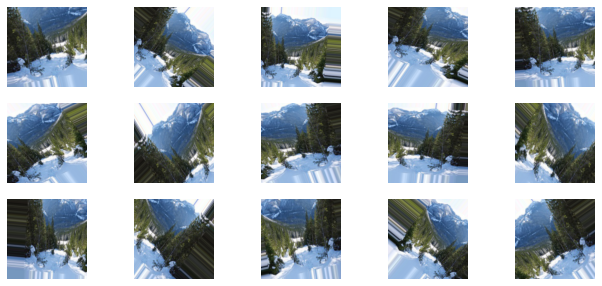

In [ ]:
x, y = next(train_generator)
X =np.array(x[0])
plt.imshow(X)
plt.show()

plt.figure(figsize=(11, 5))
flow = augmenting_datagen.flow(X[np.newaxis, :, :, :]*255) # *255 car X dans [0,1] mais on a besoin pour la suite de garder le rescale=1/255 dans augmenting_datagen
for i, X_augmented in zip(range(15), flow):
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_augmented[0])
    plt.axis('off')

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(Conv2D(32, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

train_generator_augmented = augmenting_datagen.flow_from_directory(
      input_dir,
      target_size=(256, 256),
      batch_size=32,
      class_mode='categorical',
      subset='training') #même subset que pour datagen, coherent avec validation_generator qui se fait sur d'autres échantillons.

history = model.fit(
      train_generator_augmented,
      steps_per_epoch=94,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=23)

Found 3026 images belonging to 7 classes.
Epoch 1/10
94/94 [==============================] - 51s 536ms/step - loss: 12.6308 - accuracy: 0.2645 - val_loss: 1.6068 - val_accuracy: 0.3832
Epoch 2/10
94/94 [==============================] - 50s 529ms/step - loss: 1.6181 - accuracy: 0.3790 - val_loss: 1.4599 - val_accuracy: 0.4130
Epoch 3/10
94/94 [==============================] - 49s 521ms/step - loss: 1.5299 - accuracy: 0.4296 - val_loss: 1.0186 - val_accuracy: 0.6332
Epoch 4/10
94/94 [==============================] - 49s 524ms/step - loss: 1.2899 - accuracy: 0.5366 - val_loss: 1.1354 - val_accuracy: 0.5870
Epoch 5/10
94/94 [==============================] - 49s 522ms/step - loss: 1.2408 - accuracy: 0.5315 - val_loss: 1.0082 - val_accuracy: 0.6168
Epoch 6/10
94/94 [==============================] - 48s 515ms/step - loss: 1.1422 - accuracy: 0.5815 - val_loss: 0.8456 - val_accuracy: 0.6685
Epoch 7/10
94/94 [==============================] - 48s 513ms/step - loss: 1.0594 - accuracy: 0.602

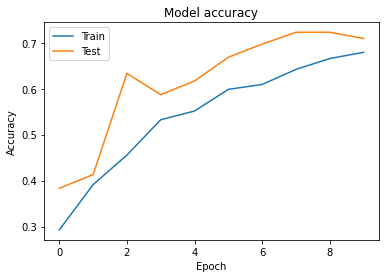

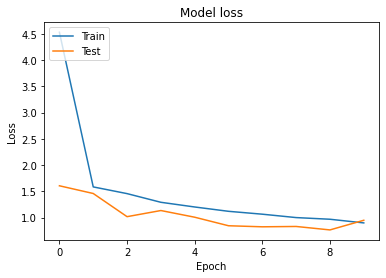

In [ ]:
plot_learning_curves(history)

# 4) Utilisation d'un réseau pré-entrainé

Le code suivant récupère un réseau entrainé sur Imagenet et enlève les dernières couches du réseau.

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
def extract_features(subset, sample_count):
    batch_size=32

    features = np.zeros(shape=(sample_count, 8, 8, 512))
    labels = np.zeros(shape=(sample_count,num_classes)) #,num_classes car hot encoding comparé au tp2
    generator = datagen.flow_from_directory(
        input_dir,
        target_size=(256, 256),
        batch_size=batch_size,
        class_mode='categorical',
        subset=subset)
    i = 0

    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features('training', 32*94)
test_features, test_labels = extract_features('validation', 32*23)

Found 3026 images belonging to 7 classes.
Found 755 images belonging to 7 classes.


In [ ]:
train_features = np.reshape(train_features, (32*94, 8 * 8 * 512))
test_features = np.reshape(test_features, (32*23, 8 * 8 * 512))

Epoch 1/10
94/94 [==============================] - 1s 9ms/step - loss: 1.6312 - accuracy: 0.4162 - val_loss: 0.7624 - val_accuracy: 0.8329
Epoch 2/10
94/94 [==============================] - 1s 7ms/step - loss: 0.8030 - accuracy: 0.7594 - val_loss: 0.5302 - val_accuracy: 0.8750
Epoch 3/10
94/94 [==============================] - 1s 8ms/step - loss: 0.6062 - accuracy: 0.8251 - val_loss: 0.4356 - val_accuracy: 0.8954
Epoch 4/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4704 - accuracy: 0.8612 - val_loss: 0.3983 - val_accuracy: 0.8832
Epoch 5/10
94/94 [==============================] - 1s 7ms/step - loss: 0.4171 - accuracy: 0.8706 - val_loss: 0.3623 - val_accuracy: 0.9035
Epoch 6/10
94/94 [==============================] - 1s 8ms/step - loss: 0.3596 - accuracy: 0.8842 - val_loss: 0.3437 - val_accuracy: 0.9008
Epoch 7/10
94/94 [==============================] - 1s 7ms/step - loss: 0.3171 - accuracy: 0.9064 - val_loss: 0.3301 - val_accuracy: 0.8954
Epoch 8/10
94/94 [==

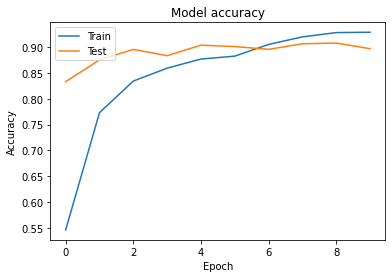

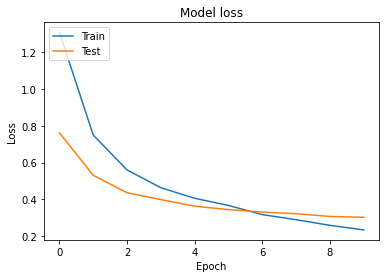

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(8 * 8 * 512,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer=RMSprop(lr=2e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(test_features, test_labels))

plot_learning_curves(history)

# 5) Comparaison des résultats

Maximum d'accuracy obtenu selon les différents modèles :\
• 1/ CNN_ref : 0.6997 (à l'époque 5)\
• 2/ CNN_ref avec un dropout 0.5 à la fin : 0.7473 (à l'époque 7)\
• 3/ Data augmentation puis CNN_ref : 0.7228 (à l'époque 7)\
• 4/ Réseau pré entrainé pour RNN sur features extraites : 0.9076 (à l'époque 9)<br><br>L'utilisation du réseau pré entrainé apporte une amélioration considérable de l'accuracy. Le dropout et la data augmentation semblent améliorer le résultat, mais pas de manière significative.

# 6) Affichage d'erreurs de prédiction.

On a malheureusement perdu les images correspondantes aux features. On cherche des exemples où la prédiction est éronnée en conservant itérativement une série de 32 images puis en recommencant.

In [ ]:
lab_dico={0:'city',1:'field', 2:'forest', 3:'lake', 4:'mountain', 5:'ocean', 6:'road'}

Found 755 images belonging to 7 classes.
Vrai label : field  Label prédiction : lake


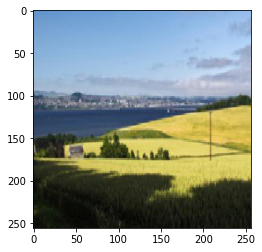

Vrai label : ocean  Label prédiction : lake


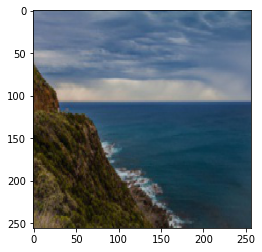

Vrai label : ocean  Label prédiction : lake


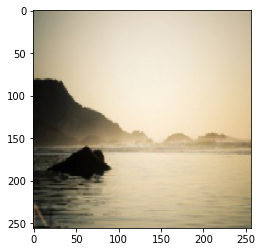

Vrai label : mountain  Label prédiction : road


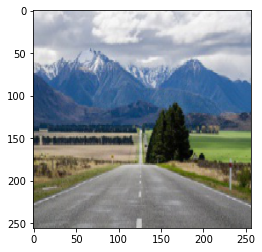

Vrai label : ocean  Label prédiction : lake


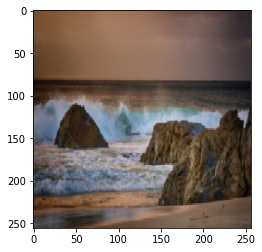

In [ ]:
generator = datagen.flow_from_directory(
    input_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset="validation")

i=0
while i<5 :
  x, y = next(generator)
  features_batch = np.reshape(conv_base.predict(x),(32, 8 * 8 * 512))
  pred=model.predict(features_batch)
  wrong_idx=np.where(np.argmax(pred,axis=1)!=np.argmax(y,axis=1))[0]

  for widx in wrong_idx :
    i+=1

    print("Vrai label :",lab_dico[np.argmax(y[widx,:])]," Label prédiction :",lab_dico[np.argmax(pred[widx,:])])
    plt.imshow(x[widx])
    plt.show()

    if i>=5 :
      break

On comprend sur ces différents exemple pourquoi la prédiction s'est trompée : souvent ces photos peuvent être vu comme appartenant à plusieurs paysages.

# 7) Visualisation de projections dans l'espace des features.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

n=500

X_pca = PCA().fit_transform(train_features[:n,:])
X_tsne = TSNE(n_components=2).fit_transform(X_pca)

In [ ]:
print(np.shape(X_pca))
print(np.shape(X_tsne))

(500, 500)
(500, 2)


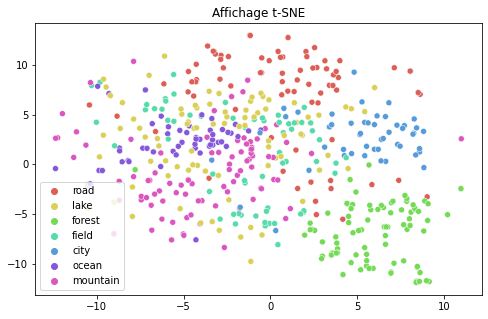

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
plt.title("Affichage t-SNE")
sns.scatterplot(
    x=X_tsne[:,0], y=X_tsne[:,1],
    hue=np.vectorize(lab_dico.get)(np.argmax(train_labels[:n,:],axis=1)),
    palette=sns.color_palette("hls", 7),
    legend="full",
)
plt.show()

On voit par exemple que la classe forêt se distingue assez, que les classes city et road sont proches, que la classe lake se confond assez avec les autres classes dans cette représentation.

# 8) Recherche d'images proches

Recherches d'images proches à partir des features obtenus avec imagenet

In [ ]:
generator = datagen.flow_from_directory(
    input_dir,
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
)

x_ref, y = next(generator)
features_batch_ref = np.reshape(conv_base.predict(x_ref),( 8 * 8 * 512))


min_dist=np.zeros((3))+1000
min_img=np.zeros((3,256,256,3))

i=0
while i<3781 :
  i+=1
  x, y = next(generator)
  features_batch = np.reshape(conv_base.predict(x),( 8 * 8 * 512))
  d=np.sqrt(np.sum((features_batch_ref-features_batch)**2))
  if d<min_dist[-1] :
    min_dist[-1]=d
    min_img[-1,:,:]=x[0]

    p = min_dist.argsort()
    min_dist=min_dist[p]
    min_img=min_img[p,:,:]

    print(i, "  min dists :",min_dist)

Found 3781 images belonging to 7 classes.
1   min dists : [  52.18907928 1000.         1000.        ]
2   min dists : [  52.18907928   57.91099548 1000.        ]
3   min dists : [52.18907928 53.18512726 57.91099548]
4   min dists : [49.41421127 52.18907928 53.18512726]
6   min dists : [49.41421127 51.23342514 52.18907928]
9   min dists : [48.51748276 49.41421127 51.23342514]
11   min dists : [48.51748276 49.20567703 49.41421127]
21   min dists : [48.51748276 48.68528748 49.20567703]
26   min dists : [48.51748276 48.62264252 48.68528748]
32   min dists : [48.51748276 48.57820892 48.62264252]
63   min dists : [46.94740677 48.51748276 48.57820892]
80   min dists : [46.12143326 46.94740677 48.51748276]
118   min dists : [46.12143326 46.94740677 48.2294426 ]
120   min dists : [46.12143326 46.94740677 48.20952606]
128   min dists : [46.12143326 46.94740677 47.69188309]
135   min dists : [45.18177795 46.12143326 46.94740677]
150   min dists : [45.18177795 46.12143326 46.80200958]
252   min di

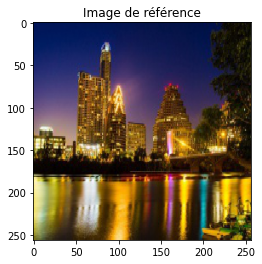

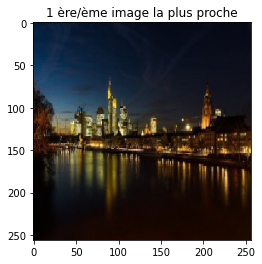

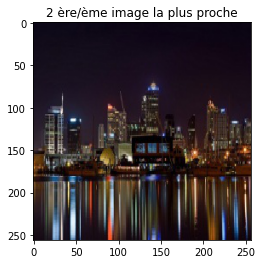

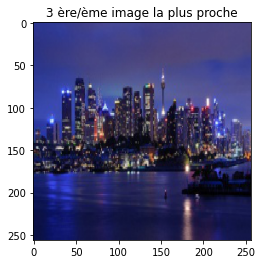

In [ ]:
plt.title("Image de référence")
plt.imshow(x_ref[0])
plt.show()
for i in range(3):
  plt.title(str(i+1)+" ère/ème image la plus proche")
  plt.imshow(min_img[i,:,:,:])
  plt.show()

Recherches d'images proches à partir des features obtenus avec le perceptron entrainé à partir d'imagenet.\
Ces features sont maintenant de taille 256 au lieu de 8x8x512.

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               8388864   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 1799      
Total params: 8,390,663
Trainable params: 8,390,663
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.models import Model

intermediate_layer_model = Model(inputs=model.input,
                                       outputs=model.get_layer('dense_6').output)

In [ ]:
features_batch_ref2 = np.reshape(conv_base.predict(x_ref),(1, 8 * 8 * 512))
features_batch_ref2 = np.reshape(intermediate_layer_model(features_ref2),(256))

min_dist2=np.zeros((3))+1000
min_img2=np.zeros((3,256,256,3))

i=0
while i<3781 :
  i+=1
  x, y = next(generator)
  features_batch = np.reshape(conv_base.predict(x),(1, 8 * 8 * 512))
  features_batch = np.reshape(intermediate_layer_model(features_batch),(256))
  d=np.sqrt(np.sum((features_batch_ref2-features_batch)**2))
  if d<min_dist2[-1] and d!=0 :
    min_dist2[-1]=d
    min_img2[-1,:,:]=x[0]

    p = min_dist2.argsort()
    min_dist2=min_dist2[p]
    min_img2=min_img2[p,:,:]

    print(i, "  min dists :",min_dist2)

1   min dists : [  11.66518021 1000.         1000.        ]
2   min dists : [  11.66518021   14.00442886 1000.        ]
3   min dists : [11.63477421 11.66518021 14.00442886]
4   min dists : [11.63477421 11.66518021 13.93420315]
6   min dists : [ 7.05145884 11.63477421 11.66518021]
13   min dists : [ 7.05145884 10.75789928 11.63477421]
17   min dists : [ 7.05145884 10.75789928 11.11917591]
28   min dists : [ 7.05145884 10.00530338 10.75789928]
55   min dists : [ 7.05145884  9.71402264 10.00530338]
101   min dists : [7.05145884 7.09467793 9.71402264]
114   min dists : [5.46792316 7.05145884 7.09467793]
124   min dists : [5.46792316 5.49632263 7.05145884]
142   min dists : [5.27625656 5.46792316 5.49632263]
438   min dists : [5.08826447 5.27625656 5.46792316]
527   min dists : [4.93714905 5.08826447 5.27625656]
693   min dists : [4.93714905 5.08826447 5.16669416]
931   min dists : [4.93714905 4.96040154 5.08826447]
1744   min dists : [4.93714905 4.96040154 5.03848982]
1929   min dists : [

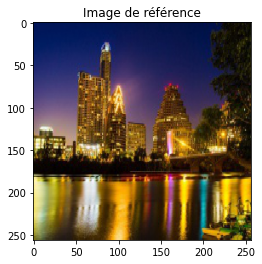

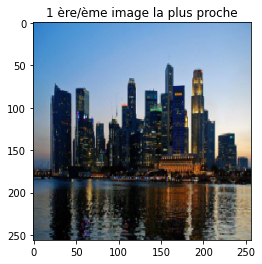

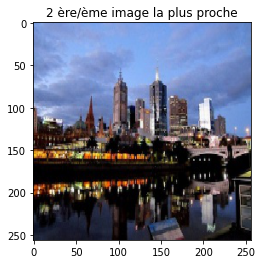

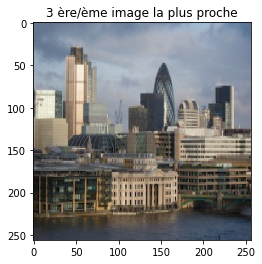

In [ ]:
plt.title("Image de référence")
plt.imshow(x_ref[0])
plt.show()
for i in range(3):
  plt.title(str(i+1)+" ère/ème image la plus proche")
  plt.imshow(min_img2[i,:,:,:])
  plt.show()